<div style="
    background: linear-gradient(90deg, #ff5f6d, #ffc371);
    color: white;
    padding: 18px 32px;
    border-radius: 40px;
    font-size: 26px;
    font-weight: 600;
    text-align: center;
    box-shadow: 0 4px 10px rgba(0,0,0,0.18);
    letter-spacing: 0.5px;
">
     Step 1 ｜ 데이터 불러오기
</div>

In [1]:
import numpy as np
import pandas as pd
import os
geo = pd.read_csv("C://Users//wkdal//DREW_PY//2025//Personal_Projects//Geospatial Analysis of Brazilian E-Commerce//olist_geolocation_dataset.csv//olist_geolocation_dataset.csv")

<div style="
    background: linear-gradient(90deg, #ff5f6d, #ffc371);
    color: white;
    padding: 18px 32px;
    border-radius: 40px;
    font-size: 26px;
    font-weight: 600;
    text-align: center;
    box-shadow: 0 4px 10px rgba(0,0,0,0.18);
    letter-spacing: 0.5px;
">
     Step 2 ｜ Data EDA : 브라질 우편 번호
</div>

In [2]:
geo['geolocation_zip_code_prefix'] = geo['geolocation_zip_code_prefix'].astype(str)

In [3]:
geo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000163 entries, 0 to 1000162
Data columns (total 5 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   geolocation_zip_code_prefix  1000163 non-null  object 
 1   geolocation_lat              1000163 non-null  float64
 2   geolocation_lng              1000163 non-null  float64
 3   geolocation_city             1000163 non-null  object 
 4   geolocation_state            1000163 non-null  object 
dtypes: float64(2), object(3)
memory usage: 38.2+ MB


In [4]:
# 우편 번호 탐색(우편번호의 앞 세 자리와 앞 네 자리를 추출한다. 이후 이 값들을 활용해 우편번호가 어떻게 작동하는지 더 자세히 살펴볼 것이다.)
geo['geolocation_zip_code_prefix_1_digits'] = geo['geolocation_zip_code_prefix'].str[0:1]
geo['geolocation_zip_code_prefix_2_digits'] = geo['geolocation_zip_code_prefix'].str[0:2]
geo['geolocation_zip_code_prefix_3_digits'] = geo['geolocation_zip_code_prefix'].str[0:3]
geo['geolocation_zip_code_prefix_4_digits'] = geo['geolocation_zip_code_prefix'].str[0:4]

In [5]:
geo

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state,geolocation_zip_code_prefix_1_digits,geolocation_zip_code_prefix_2_digits,geolocation_zip_code_prefix_3_digits,geolocation_zip_code_prefix_4_digits
0,1037,-23.545621,-46.639292,sao paulo,SP,1,10,103,1037
1,1046,-23.546081,-46.644820,sao paulo,SP,1,10,104,1046
2,1046,-23.546129,-46.642951,sao paulo,SP,1,10,104,1046
3,1041,-23.544392,-46.639499,sao paulo,SP,1,10,104,1041
4,1035,-23.541578,-46.641607,sao paulo,SP,1,10,103,1035
...,...,...,...,...,...,...,...,...,...
1000158,99950,-28.068639,-52.010705,tapejara,RS,9,99,999,9995
1000159,99900,-27.877125,-52.224882,getulio vargas,RS,9,99,999,9990
1000160,99950,-28.071855,-52.014716,tapejara,RS,9,99,999,9995
1000161,99980,-28.388932,-51.846871,david canabarro,RS,9,99,999,9998


In [6]:
geo['geolocation_zip_code_prefix'].value_counts().to_frame()

,count
geolocation_zip_code_prefix,
24220,1146
24230,1102
38400,965
35500,907
11680,879
...,...
57140,1
57604,1
57750,1


In [7]:
geo['geolocation_zip_code_prefix'].value_counts().to_frame().describe()

,count
count,19015.000000
mean,52.598633
std,72.057907
min,1.000000
25%,10.000000
50%,29.000000
75%,66.500000
max,1146.000000


In [8]:
geo = geo[geo.geolocation_lat <= 5.27438888]
geo = geo[geo.geolocation_lng >= -73.98283055]
geo = geo[geo.geolocation_lat >= -33.75116944]
geo = geo[geo.geolocation_lng <=  -34.79314722]

In [9]:
from datashader.utils import lnglat_to_meters as webm
x, y = webm(geo.geolocation_lng, geo.geolocation_lat)
geo['x'] = pd.Series(x)
geo['y'] = pd.Series(y)

In [10]:
geo.head(3)

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state,geolocation_zip_code_prefix_1_digits,geolocation_zip_code_prefix_2_digits,geolocation_zip_code_prefix_3_digits,geolocation_zip_code_prefix_4_digits,x,y
0,1037,-23.545621,-46.639292,sao paulo,SP,1,10,103,1037,-5.191862e+06,-2.698137e+06
1,1046,-23.546081,-46.644820,sao paulo,SP,1,10,104,1046,-5.192478e+06,-2.698193e+06
2,1046,-23.546129,-46.642951,sao paulo,SP,1,10,104,1046,-5.192270e+06,-2.698199e+06


In [11]:
# 우편번호 정수형 변환

geo['geolocation_zip_code_prefix'] = geo['geolocation_zip_code_prefix'].astype(int)
geo['geolocation_zip_code_prefix_1_digits'] = geo['geolocation_zip_code_prefix_1_digits'].astype(int)
geo['geolocation_zip_code_prefix_2_digits'] = geo['geolocation_zip_code_prefix_2_digits'].astype(int)
geo['geolocation_zip_code_prefix_3_digits'] = geo['geolocation_zip_code_prefix_3_digits'].astype(int)
geo['geolocation_zip_code_prefix_4_digits'] = geo['geolocation_zip_code_prefix_4_digits'].astype(int)


In [12]:
# 브라질 전체 우편번호 prefix 컬럼에 대해 통계 요약
brazil = geo
agg_name = 'geolocation_zip_code_prefix'
brazil[agg_name].describe().to_frame()


,geolocation_zip_code_prefix
count,1.000121e+06
mean,3.657332e+04
std,3.054939e+04
min,1.001000e+03
25%,1.107500e+04
50%,2.653000e+04
75%,6.350400e+04
max,9.999000e+04


Loading BokehJS ...

<img src='data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAEAAAABACAYAAACqaXHeAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAAB+wAAAfsBxc2miwAAABl0RVh0U29mdHdhcmUAd3d3Lmlua3NjYXBlLm9yZ5vuPBoAAA6zSURB
VHic7ZtpeFRVmsf/5966taWqUlUJ2UioBBJiIBAwCZtog9IOgjqACsogKtqirT2ttt069nQ/zDzt
tI4+CrJIREFaFgWhBXpUNhHZQoKBkIUASchWla1S+3ar7r1nPkDaCAnZKoQP/D7mnPOe9/xy76n3
nFSAW9ziFoPFNED2LLK5wcyBDObkb8ZkxuaoSYlI6ZcOKq1eWFdedqNzGHQBk9RMEwFAASkk0Xw3
ETacDNi2vtvc7L0ROdw0AjoSotQVkKSvHQz/wRO1lScGModBFbDMaNRN1A4tUBCS3lk7BWhQkgpD
lG4852/+7DWr1R3uHAZVQDsbh6ZPN7CyxUrCzJMRouusj0ipRwD2uKm0Zn5d2dFwzX1TCGhnmdGo
G62Nna+isiUqhkzuKrkQaJlPEv5mFl2fvGg2t/VnzkEV8F5ioioOEWkLG86fvbpthynjdhXYZziQ
x1hC9J2NFyi8vCTt91Fh04KGip0AaG9zuCk2wQCVyoNU3Hjezee9bq92duzzTmxsRJoy+jEZZZYo
GTKJ6SJngdJqAfRzpze0+jHreUtPc7gpBLQnIYK6BYp/uGhw9YK688eu7v95ysgshcg9qSLMo3JC
4jqLKQFBgdKDPoQ+Pltb8dUyQLpeDjeVgI6EgLIQFT5tEl3rn2losHVsexbZ3EyT9wE1uGdkIPcy
BGxn8QUq1QrA5nqW5i2tLqvrrM9NK6AdkVIvL9E9bZL/oyfMVd/jqvc8LylzRBKDJSzIExwhQzuL
QYGQj4rHfFTc8mUdu3E7yoLtbTe9gI4EqVgVkug2i5+uXGo919ixbRog+3fTbQ8qJe4ZOYNfMoTI
OoshUNosgO60AisX15aeI2PSIp5KiFLI9ubb1vV3Qb2ltwLakUCDAkWX7/nHKRmmGIl9VgYsUhJm
2NXjKYADtM1ygne9QQDIXlk49FBstMKx66D1v4+XuQr7vqTe0VcBHQlRWiOCbmmSYe2SqtL6q5rJ
zsTb7lKx3FKOYC4DoqyS/B5bvLPxvD9Qtf6saxYLQGJErmDOdOMr/zo96km1nElr8bmPOBwI9COv
HnFPRIwmkSOv9kcAS4heRsidOkpeWBgZM+UBrTFAXNYL5Vf2ii9c1trNzpYdaoVil3WIc+wdk+gQ
noie3ecCcxt9ITcLAPWt/laGEO/9U6PmzZkenTtsSMQ8uYywJVW+grCstAvCIaAdArAsIWkRDDs/
KzLm2YcjY1Lv0UdW73HabE9n6V66cxSzfEmuJssTpKGVp+0vHq73FwL46eOjpMpbRAnNmJFrGJNu
Ukf9Yrz+3rghiumCKNXXWPhLYcjxGsIpoCMsIRoFITkW8AuyM8jC1+/QLx4bozCEJIq38+1rtpR6
V/yzb8eBlRb3fo5l783N0CWolAzJHaVNzkrTzlEp2bQ2q3TC5gn6wpnoQAmwSiGh2GitnTmVMc5O
UyfKWUKCIsU7+fZDKwqdT6DDpvkzAX4/+AMFjk0tDp5GRXLpQ2MUmhgDp5gxQT8+Y7hyPsMi8uxF
71H0oebujHALECjFKaW9Lm68n18wXp2kVzIcABytD5iXFzg+WVXkegpAsOOYziqo0OkK76GyquC3
ltZAzMhhqlSNmmWTE5T6e3IN05ITFLM4GdN0vtZ3ob8Jh1NAKXFbm5PtLU/eqTSlGjkNAJjdgn/N
aedXa0tdi7+t9G0FIF49rtMSEgAs1kDLkTPO7ebm4IUWeyh1bKomXqlgMG6kJmHcSM0clYLJ8XtR
1GTnbV3F6I5wCGikAb402npp1h1s7LQUZZSMIfALFOuL3UUrfnS8+rez7v9qcold5tilgHbO1fjK
9ubb17u9oshxzMiUBKXWqJNxd+fqb0tLVs4lILFnK71H0Ind7uiPgACVcFJlrb0tV6DzxqqTIhUM
CwDf1/rrVhTa33/3pGPxJYdQ2l2cbgVcQSosdx8uqnDtbGjh9SlDVSMNWhlnilfqZk42Th2ZpLpf
xrHec5e815zrr0dfBZSwzkZfqsv+1FS1KUknUwPARVvItfKUY+cn57yP7qv07UE3p8B2uhUwLk09
e0SCOrK+hbdYHYLjRIl71wWzv9jpEoeOHhGRrJAzyEyNiJuUqX0g2sBN5kGK6y2Blp5M3lsB9Qh4
y2Ja6x6+i0ucmKgwMATwhSjdUu49tKrQ/pvN5d53ml2CGwCmJipmKjgmyuaXzNeL2a0AkQ01Th5j
2DktO3Jyk8f9vcOBQHV94OK+fPumJmvQHxJoWkaKWq9Vs+yUsbq0zGT1I4RgeH2b5wef7+c7bl8F
eKgoHVVZa8ZPEORzR6sT1BzDUAD/d9F78e2Tzv99v8D+fLVTqAKAsbGamKey1Mt9Ann4eH3gTXTz
idWtAJ8PQWOk7NzSeQn/OTHDuEikVF1R4z8BQCy+6D1aWRfY0tTGG2OM8rRoPaeIj5ZHzJxszElN
VM8K8JS5WOfv8mzRnQAKoEhmt8gyPM4lU9SmBK1MCQBnW4KONT86v1hZ1PbwSXPw4JWussVjtH9Y
NCoiL9UoH/6PSu8jFrfY2t36erQHXLIEakMi1SydmzB31h3GGXFDFNPaK8Rme9B79Ixrd0WN+1ij
NRQ/doRmuFLBkHSTOm5GruG+pFjFdAmorG4IXH1Qua6ASniclfFtDYt+oUjKipPrCQB7QBQ2lrgP
fFzm+9XWUtcqJ3/5vDLDpJ79XHZk3u8nGZ42qlj1+ydtbxysCezrydp6ugmipNJ7WBPB5tydY0jP
HaVNzs3QzeE4ZpTbI+ZbnSFPbVOw9vsfnVvqWnirPyCNGD08IlqtYkh2hjZ5dErEQzoNm+6ykyOt
Lt5/PQEuSRRKo22VkydK+vvS1XEKlhCJAnsqvcVvH7f/ZU2R67eXbMEGAMiIV5oWZWiWvz5Fv2xG
sjqNJQRvn3Rs2lji/lNP19VjAQDgD7FHhujZB9OGqYxRkZxixgRDVlqS6uEOFaJUVu0rPFzctrnF
JqijImVp8dEKVWyUXDk92zAuMZ6bFwpBU1HrOw6AdhQgUooChb0+ItMbWJitSo5Ws3IAOGEOtL53
0vHZih9sC4vtofZ7Qu6523V/fmGcds1TY3V36pUsBwAbSlxnVh2xLfAD/IAIMDf7XYIkNmXfpp2l
18rkAJAy9HKFaIr/qULkeQQKy9zf1JgDB2uaeFNGijo5QsUyacNUUTOnGO42xSnv4oOwpDi1zYkc
efUc3I5Gk6PhyTuVKaOGyLUAYPGIoY9Pu/atL/L92+4q9wbflRJ2Trpm/jPjdBtfnqB/dIThcl8A
KG7hbRuKnb8qsQsVvVlTrwQAQMUlf3kwJI24Z4JhPMtcfng5GcH49GsrxJpGvvHIaeem2ma+KSjQ
lIwUdYyCY8j4dE1KzijNnIP2llF2wcXNnsoapw9XxsgYAl6k+KzUXbi2yP3KR2ecf6z3BFsBICdW
nvnIaG3eHybqX7vbpEqUMT+9OL4Qpe8VON7dXuFd39v19FoAABRVePbGGuXTszO0P7tu6lghUonE
llRdrhArLvmKdh9u29jcFiRRkfLUxBiFNiqSU9icoZQHo5mYBI1MBgBH6wMNb+U7Pnw337H4gi1Y
ciWs+uks3Z9fztUvfzxTm9Ne8XXkvQLHNytOOZeiD4e0PgkAIAYCYknKUNUDSXEKzdWNpnil7r4p
xqkjTarZMtk/K8TQ6Qve78qqvXurGwIJqcOUKfUWHsm8KGvxSP68YudXq4pcj39X49uOK2X142O0
Tz5/u/7TVybqH0rSya6ZBwD21/gubbrgWdDgEOx9W
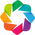

C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_7484\4137408849.py:12: HoloviewsDeprecationWarning: IPython magic is deprecated and will be removed in version 1.23.0.
  get_ipython().run_line_magic('opts', "Overlay [width=800 height=600 toolbar='above' xaxis=None yaxis=None]")
C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_7484\4137408849.py:13: HoloviewsDeprecationWarning: IPython magic is deprecated and will be removed in version 1.23.0.
  get_ipython().run_line_magic('opts', "QuadMesh [tools=['hover'] colorbar=True] (alpha=0 hover_alpha=0.2)")


In [13]:
import holoviews as hv
import geoviews as gv
import datashader as ds

from colorcet import fire, rainbow, bgy, bjy, bkr, kb, kr
from datashader.colors import colormap_select, Greys9
from holoviews.streams import RangeXY
from holoviews.operation.datashader import datashade, dynspread, rasterize
from bokeh.io import push_notebook, show, output_notebook
output_notebook()
hv.extension('bokeh')
%opts Overlay [width=800 height=600 toolbar='above' xaxis=None yaxis=None]
%opts QuadMesh [tools=['hover'] colorbar=True] (alpha=0 hover_alpha=0.2)
T = 0.05
PX = 1
def plot_map(data, label, agg_data, agg_name, cmap):
    url = "http://server.arcgisonline.com/ArcGIS/rest/services/Canvas/World_Dark_Gray_Base/MapServer/tile/{Z}/{Y}/{X}.png"
    geomap = gv.WMTS(url)
    points = hv.Points(gv.Dataset(data, kdims=['x', 'y'], vdims=[agg_name]))
    agg = datashade(points, element_type=gv.Image, aggregator=agg_data, cmap=cmap)
    zip_codes = dynspread(agg, threshold=T, max_px=PX)
    hover = hv.util.Dynamic(
        rasterize(points, aggregator=agg_data, width=50, height=25, streams=[RangeXY]),
        operation=hv.QuadMesh
    )
    hover = hover.options(cmap=cmap)
    img = geomap * zip_codes * hover
    img = img.relabel(label)
    return img
brazil = geo
agg_name = 'geolocation_zip_code_prefix'

In [14]:
plot_map(
    data=brazil,
    label='브라질 전체 우편번호',
    agg_data=ds.mean(agg_name),
    agg_name=agg_name,
    cmap=rainbow
)

:DynamicMap   []
   :Overlay
      .WMTS.I     :WMTS   [Longitude,Latitude]
      .RGB.I      :RGB   [x,y]   (R,G,B,A)
      .QuadMesh.I :QuadMesh   [x,y]   (x_y geolocation_zip_code_prefix)

<div style="
    background: linear-gradient(90deg, #ff5f6d, #ffc371);
    color: white;
    padding: 18px 32px;
    border-radius: 40px;
    font-size: 26px;
    font-weight: 600;
    text-align: center;
    box-shadow: 0 4px 10px rgba(0,0,0,0.18);
    letter-spacing: 0.5px;
">
     Step 2-1 ｜ Data EDA : 주 단위 우편 번호
</div>

# 주별 우편번호 구조는 어떠한가?

In [15]:
def filter_data(level, name):
    df = geo[geo[level] == name]
    df = df[(df.x <= df.x.quantile(0.999)) & (df.x >= df.x.quantile(0.001))]
    df = df[(df.y <= df.y.quantile(0.999)) & (df.y >= df.y.quantile(0.001))]
    return df

In [16]:
sp = filter_data('geolocation_state', 'SP')
agg_name = 'geolocation_zip_code_prefix'
sp[agg_name].describe().to_frame()

,geolocation_zip_code_prefix
count,402651.000000
mean,9030.831782
std,5101.941134
min,1001.000000
25%,4661.000000
50%,8257.000000
75%,13330.000000
max,19990.000000


In [17]:
plot_map(
    sp,
    '상파울루 주 부근, 도심/내륙 (최소값) 분포',
    ds.min(agg_name),
    agg_name,
    cmap=rainbow
)

:DynamicMap   []
   :Overlay
      .WMTS.I     :WMTS   [Longitude,Latitude]
      .RGB.I      :RGB   [x,y]   (R,G,B,A)
      .QuadMesh.I :QuadMesh   [x,y]   (x_y geolocation_zip_code_prefix)

In [18]:
plot_map(
    sp,
    '상파울루 주 부근, 도심/내륙 (평균) 분포',
    ds.mean(agg_name),
    agg_name,
    cmap=rainbow
)

:DynamicMap   []
   :Overlay
      .WMTS.I     :WMTS   [Longitude,Latitude]
      .RGB.I      :RGB   [x,y]   (R,G,B,A)
      .QuadMesh.I :QuadMesh   [x,y]   (x_y geolocation_zip_code_prefix)

<div style="
    background: linear-gradient(90deg, #ff5f6d, #ffc371);
    color: white;
    padding: 18px 32px;
    border-radius: 40px;
    font-size: 26px;
    font-weight: 600;
    text-align: center;
    box-shadow: 0 4px 10px rgba(0,0,0,0.18);
    letter-spacing: 0.5px;
">
     Step 2-3 ｜ Data EDA : 대도시의 우편 번호
</div>

# 대도시 내 우편번호 구조 분석

In [19]:
saopaulo = filter_data('geolocation_city', 'sao paulo')   # geo 데이터에서 geolocation_city == 'sao paulo' 인 행만 필터링하여 상파울루 시 데이터만 추출

agg_name = 'geolocation_zip_code_prefix'                  # 분석에 사용할 컬럼명(우편번호 prefix)을 변수로 지정

saopaulo[agg_name].describe().to_frame()                  # 상파울루의 ZIP prefix 통계값(count, mean, min~max 등)을 DataFrame 형태로 출력


,geolocation_zip_code_prefix
count,135256.000000
mean,4137.454996
std,1804.189554
min,1001.000000
25%,2941.000000
50%,4166.000000
75%,5158.000000
max,9540.000000


In [20]:
plot_map(saopaulo, '상파울루 주 지역별 우편번호 (최소값) 분포', ds.min(agg_name), agg_name, cmap=rainbow)


:DynamicMap   []
   :Overlay
      .WMTS.I     :WMTS   [Longitude,Latitude]
      .RGB.I      :RGB   [x,y]   (R,G,B,A)
      .QuadMesh.I :QuadMesh   [x,y]   (x_y geolocation_zip_code_prefix)

In [21]:
plot_map(
    saopaulo,
    '상파울루 주 지역별 우편번호 (평균) 분포',
    ds.mean(agg_name),
    agg_name,
    cmap=rainbow
)

:DynamicMap   []
   :Overlay
      .WMTS.I     :WMTS   [Longitude,Latitude]
      .RGB.I      :RGB   [x,y]   (R,G,B,A)
      .QuadMesh.I :QuadMesh   [x,y]   (x_y geolocation_zip_code_prefix)

<div style="
    background: linear-gradient(90deg, #ff5f6d, #ffc371);
    color: white;
    padding: 18px 32px;
    border-radius: 40px;
    font-size: 26px;
    font-weight: 600;
    text-align: center;
    box-shadow: 0 4px 10px rgba(0,0,0,0.18);
    letter-spacing: 0.5px;
">
     Step 2-4 ｜ Data EDA : 소도시의 우편번호
</div>

# 소도시의 우편번호 구조

In [22]:
atibaia = geo[geo['geolocation_city'] == 'atibaia']
agg_name = 'geolocation_zip_code_prefix'
atibaia[agg_name].describe().to_frame()

,geolocation_zip_code_prefix
count,1254.000000
mean,12945.042265
std,4.197704
min,12940.000000
25%,12942.000000
50%,12944.000000
75%,12948.000000
max,12954.000000


In [23]:
plot_map(atibaia, '아타바디아 우편번호', ds.min(agg_name), agg_name, cmap=rainbow)

:DynamicMap   []
   :Overlay
      .WMTS.I     :WMTS   [Longitude,Latitude]
      .RGB.I      :RGB   [x,y]   (R,G,B,A)
      .QuadMesh.I :QuadMesh   [x,y]   (x_y geolocation_zip_code_prefix)

<div style="
    background: linear-gradient(90deg, #ff5f6d, #ffc371);
    color: white;
    padding: 18px 32px;
    border-radius: 40px;
    font-size: 26px;
    font-weight: 600;
    text-align: center;
    box-shadow: 0 4px 10px rgba(0,0,0,0.18);
    letter-spacing: 0.5px;
">
     Step 3 ｜ 대부분 어느 지역에서 가장 많은 매출이 발생할까요?
</div>


<div style="
    background: linear-gradient(90deg, #ff5f6d, #ffc371);
    color: white;
    padding: 18px 32px;
    border-radius: 40px;
    font-size: 26px;
    font-weight: 600;
    text-align: center;
    box-shadow: 0 4px 10px rgba(0,0,0,0.18);
    letter-spacing: 0.5px;
">
     Step 3 ｜ 데이터 불러오기
</div>



In [24]:
orders_df = pd.read_csv('C://Users//wkdal//DREW_PY//2025//Personal_Projects//Geospatial Analysis of Brazilian E-Commerce//olist_orders_dataset.csv//olist_orders_dataset.csv')
order_items = pd.read_csv('C://Users//wkdal//DREW_PY//2025//Personal_Projects//Geospatial Analysis of Brazilian E-Commerce//olist_order_items_dataset.csv//olist_order_items_dataset.csv')
order_reviews = pd.read_csv('C://Users//wkdal//DREW_PY//2025//Personal_Projects//Geospatial Analysis of Brazilian E-Commerce//olist_order_reviews_dataset.csv//olist_order_reviews_dataset.csv')
customer = pd.read_csv('C://Users//wkdal//DREW_PY//2025//Personal_Projects//Geospatial Analysis of Brazilian E-Commerce//olist_customers_dataset.csv//olist_customers_dataset.csv', dtype={'customer_zip_code_prefix': str})


<div style="
    background: linear-gradient(90deg, #ff5f6d, #ffc371);
    color: white;
    padding: 18px 32px;
    border-radius: 40px;
    font-size: 26px;
    font-weight: 600;
    text-align: center;
    box-shadow: 0 4px 10px rgba(0,0,0,0.18);
    letter-spacing: 0.5px;
">
     Step 3 ｜ Data Processing & EDA : 브라질 지역별 매출 살펴보기
</div>



In [25]:
customer['customer_zip_code_prefix_3_digits'] = customer['customer_zip_code_prefix'].str[0:3]
customer['customer_zip_code_prefix_3_digits'] = customer['customer_zip_code_prefix_3_digits'].astype(int)

In [26]:
brazil_geo = geo.set_index('geolocation_zip_code_prefix_3_digits').copy()

In [27]:
orders = orders_df.merge(order_items, on='order_id')
orders = orders.merge(customer, on='customer_id')
orders = orders.merge(order_reviews, on='order_id')

In [28]:
gp = orders.groupby('customer_zip_code_prefix_3_digits')['price'].sum().to_frame()
revenue = brazil_geo.join(gp)
agg_name = 'revenue'
revenue[agg_name] = revenue.price / 1000

In [29]:
plot_map(revenue, '브라질 지역별 매출 (thousands R$)', ds.mean(agg_name), agg_name, cmap=fire)

:DynamicMap   []
   :Overlay
      .WMTS.I     :WMTS   [Longitude,Latitude]
      .RGB.I      :RGB   [x,y]   (R,G,B,A)
      .QuadMesh.I :QuadMesh   [x,y]   (x_y revenue)

<div style="
    background: linear-gradient(90deg, #ff5f6d, #ffc371);
    color: white;
    padding: 18px 32px;
    border-radius: 40px;
    font-size: 26px;
    font-weight: 600;
    text-align: center;
    box-shadow: 0 4px 10px rgba(0,0,0,0.18);
    letter-spacing: 0.5px;
">
     Step 4 ｜ 평균 구매 가격은 얼마인가요?
</div>

In [30]:
gp = orders.groupby('order_id').agg({'price': 'sum', 'customer_zip_code_prefix_3_digits': 'max'})
gp = gp.groupby('customer_zip_code_prefix_3_digits')['price'].mean().to_frame()
avg_ticket = brazil_geo.join(gp)
agg_name = 'avg_ticket'
avg_ticket[agg_name] = avg_ticket.price
gp.head()

,price
customer_zip_code_prefix_3_digits,
10,159.935442
11,125.330571
12,146.777193
13,123.024722
14,147.127605


In [31]:
gp = orders.groupby('order_id').agg({
    'price': 'sum',
    'customer_zip_code_prefix_3_digits': 'max'
})
gp = gp.groupby('customer_zip_code_prefix_3_digits')['price'].mean().to_frame()
avg_ticket = brazil_geo.join(gp)
agg_name = 'avg_ticket'
avg_ticket[agg_name] = avg_ticket.price

In [32]:
plot_map(avg_ticket, '평균 주문 가격 (R$)', ds.mean(agg_name), agg_name, cmap=bgy)

:DynamicMap   []
   :Overlay
      .WMTS.I     :WMTS   [Longitude,Latitude]
      .RGB.I      :RGB   [x,y]   (R,G,B,A)
      .QuadMesh.I :QuadMesh   [x,y]   (x_y avg_ticket)

<div style="
    background: linear-gradient(90deg, #ff5f6d, #ffc371);
    color: white;
    padding: 18px 32px;
    border-radius: 40px;
    font-size: 26px;
    font-weight: 600;
    text-align: center;
    box-shadow: 0 4px 10px rgba(0,0,0,0.18);
    letter-spacing: 0.5px;
">
     Step 5 ｜ 누가 더 많은 배송비를 낼까요?
</div>

In [33]:
gp = orders.groupby('order_id').agg({'price': 'sum', 'freight_value': 'sum', 'customer_zip_code_prefix_3_digits': 'max'})
agg_name = 'freight_ratio'
gp[agg_name] = gp.freight_value / gp.price
gp = gp.groupby('customer_zip_code_prefix_3_digits')[agg_name].mean().to_frame()
freight_ratio = brazil_geo.join(gp)

In [34]:
plot_map(freight_ratio, '주문별 평균 배송비 부담률', ds.mean(agg_name), agg_name, cmap=bgy)

:DynamicMap   []
   :Overlay
      .WMTS.I     :WMTS   [Longitude,Latitude]
      .RGB.I      :RGB   [x,y]   (R,G,B,A)
      .QuadMesh.I :QuadMesh   [x,y]   (x_y freight_ratio)

<div style="
    background: linear-gradient(90deg, #ff5f6d, #ffc371);
    color: white;
    padding: 18px 32px;
    border-radius: 40px;
    font-size: 26px;
    font-weight: 600;
    text-align: center;
    box-shadow: 0 4px 10px rgba(0,0,0,0.18);
    letter-spacing: 0.5px;
">
     Step 6 ｜ 평균 배송 시간
</div>

In [35]:
orders['order_delivered_customer_date'] = pd.to_datetime(orders.order_delivered_customer_date)
orders['order_estimated_delivery_date'] = pd.to_datetime(orders.order_estimated_delivery_date)
orders['order_delivered_carrier_date'] = pd.to_datetime(orders.order_delivered_carrier_date)
orders['actual_delivery_time'] = orders.order_delivered_customer_date - orders.order_delivered_carrier_date
orders['actual_delivery_time'] = orders['actual_delivery_time'].dt.days

In [36]:
gp = orders.groupby('customer_zip_code_prefix_3_digits')['actual_delivery_time'].mean().to_frame()
delivery_time = brazil_geo.join(gp)
agg_name = 'avg_delivery_time'
delivery_time[agg_name] = delivery_time['actual_delivery_time']

In [37]:
plot_map(delivery_time, '주문별 평균 배송 소요 시간(일)', ds.mean(agg_name), agg_name, cmap=bjy)

:DynamicMap   []
   :Overlay
      .WMTS.I     :WMTS   [Longitude,Latitude]
      .RGB.I      :RGB   [x,y]   (R,G,B,A)
      .QuadMesh.I :QuadMesh   [x,y]   (x_y avg_delivery_time)

In [38]:
pr = filter_data('geolocation_state', 'PR').set_index('geolocation_zip_code_prefix_3_digits')
gp = orders.groupby('customer_zip_code_prefix_3_digits')['actual_delivery_time'].mean().to_frame()
pr_delivery_time = pr.join(gp)
pr_delivery_time[agg_name] = pr_delivery_time['actual_delivery_time']

주(州) 단위에서 배송 시간을 살펴보겠습니다. 이번에는 파라나(Paraná, PR) 주의 주문만 필터링했습니다.

분석 결과, 대도시일수록 평균 배송 시간이 더 짧고, 소규모 도시일수록 배송 시간이 더 길어지는 경향을 확인할 수 있습니다

In [39]:
plot_map(pr_delivery_time, '파라나 주(Paraná, PR) 주문 배송 시간(일)', ds.mean(agg_name), agg_name, cmap=bjy)

:DynamicMap   []
   :Overlay
      .WMTS.I     :WMTS   [Longitude,Latitude]
      .RGB.I      :RGB   [x,y]   (R,G,B,A)
      .QuadMesh.I :QuadMesh   [x,y]   (x_y avg_delivery_time)

<div style="
    background: linear-gradient(90deg, #ff5f6d, #ffc371);
    color: white;
    padding: 18px 32px;
    border-radius: 40px;
    font-size: 26px;
    font-weight: 600;
    text-align: center;
    box-shadow: 0 4px 10px rgba(0,0,0,0.18);
    letter-spacing: 0.5px;
">
     Step 6-1 ｜ 브라질 교외 지역(Suburbs)에 대한 흥미로운 특징
</div>

In [40]:
riodejaneiro = filter_data('geolocation_city', 'rio de janeiro').set_index('geolocation_zip_code_prefix_3_digits')
gp = orders.groupby('customer_zip_code_prefix_3_digits')['actual_delivery_time'].mean().to_frame()
rj_delivery_time = riodejaneiro.join(gp)
rj_delivery_time[agg_name] = rj_delivery_time['actual_delivery_time']

In [41]:
plot_map(rj_delivery_time, '리우데자네이루 지역의 주문별 평균 배송 시간(일)', ds.mean(agg_name), agg_name, cmap=bjy)

:DynamicMap   []
   :Overlay
      .WMTS.I     :WMTS   [Longitude,Latitude]
      .RGB.I      :RGB   [x,y]   (R,G,B,A)
      .QuadMesh.I :QuadMesh   [x,y]   (x_y avg_delivery_time)

In [42]:
poa = filter_data('geolocation_city', 'porto alegre').set_index('geolocation_zip_code_prefix_3_digits')
gp = orders.groupby('customer_zip_code_prefix_3_digits')['actual_delivery_time'].mean().to_frame()
poa_delivery_time = poa.join(gp)
poa_delivery_time[agg_name] = poa_delivery_time['actual_delivery_time']

In [43]:
plot_map(poa_delivery_time, '대도시, 포르투 알레그리 주문별 평균 배송 시간(일)', ds.mean(agg_name), agg_name, cmap=bjy)

:DynamicMap   []
   :Overlay
      .WMTS.I     :WMTS   [Longitude,Latitude]
      .RGB.I      :RGB   [x,y]   (R,G,B,A)
      .QuadMesh.I :QuadMesh   [x,y]   (x_y avg_delivery_time)

<div style="
    background: linear-gradient(90deg, #ff5f6d, #ffc371);
    color: white;
    padding: 18px 32px;
    border-radius: 40px;
    font-size: 26px;
    font-weight: 600;
    text-align: center;
    box-shadow: 0 4px 10px rgba(0,0,0,0.18);
    letter-spacing: 0.5px;
">
     Step 6-2 ｜ 평균 리뷰 점수
</div>

In [44]:
gp = orders.groupby('customer_zip_code_prefix_3_digits')['review_score'].mean().to_frame()
score = brazil_geo.join(gp)
agg_name = 'avg_score'
score[agg_name] = score['review_score']

In [45]:
plot_map(score, '평균 주문 리뷰 점수', ds.mean(agg_name), agg_name, cmap=bgy)

:DynamicMap   []
   :Overlay
      .WMTS.I     :WMTS   [Longitude,Latitude]
      .RGB.I      :RGB   [x,y]   (R,G,B,A)
      .QuadMesh.I :QuadMesh   [x,y]   (x_y avg_score)

In [46]:
rj_score = riodejaneiro.join(gp)
rj_score[agg_name] = rj_score['review_score']

In [47]:
rj_score.head()

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state,geolocation_zip_code_prefix_1_digits,geolocation_zip_code_prefix_2_digits,geolocation_zip_code_prefix_4_digits,x,y,review_score,avg_score
200,20010,-22.902472,-43.174059,rio de janeiro,RJ,2,20,2001,-4.806114e+06,-2.620229e+06,3.937037,3.937037
200,20011,-22.904813,-43.176236,rio de janeiro,RJ,2,20,2001,-4.806357e+06,-2.620511e+06,3.937037,3.937037
200,20021,-22.909710,-43.171322,rio de janeiro,RJ,2,20,2002,-4.805810e+06,-2.621103e+06,3.937037,3.937037
200,20030,-22.908640,-43.174012,rio de janeiro,RJ,2,20,2003,-4.806109e+06,-2.620974e+06,3.937037,3.937037
200,20030,-22.910499,-43.172442,rio de janeiro,RJ,2,20,2003,-4.805934e+06,-2.621199e+06,3.937037,3.937037


In [48]:
plot_map(rj_score, '리우데자네이루 지역의 주문 리뷰 평균 점수', ds.mean(agg_name), agg_name, cmap=bgy)

:DynamicMap   []
   :Overlay
      .WMTS.I     :WMTS   [Longitude,Latitude]
      .RGB.I      :RGB   [x,y]   (R,G,B,A)
      .QuadMesh.I :QuadMesh   [x,y]   (x_y avg_score)